# Technical test for the data science internship @Hyperlex

In [35]:
import os
import json
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
#!find . -iname *checkpoint* -type d -exec rm -r {} +  

In [88]:
rootdir = 'dataset'
json_files = [os.path.join(dirpath, file) for dirpath,_,files in os.walk(rootdir) for file in files if file.endswith('json')]

data = []
for file in json_files:
    with open(file) as f:
        data.append(json.load(f)['clauses'][1:])  # starting from one to skip the summary since they contain different informations 
                                                  # and could affect the classification
contracts_df = pd.DataFrame(data)

Text(0,0.5,'number of clauses')

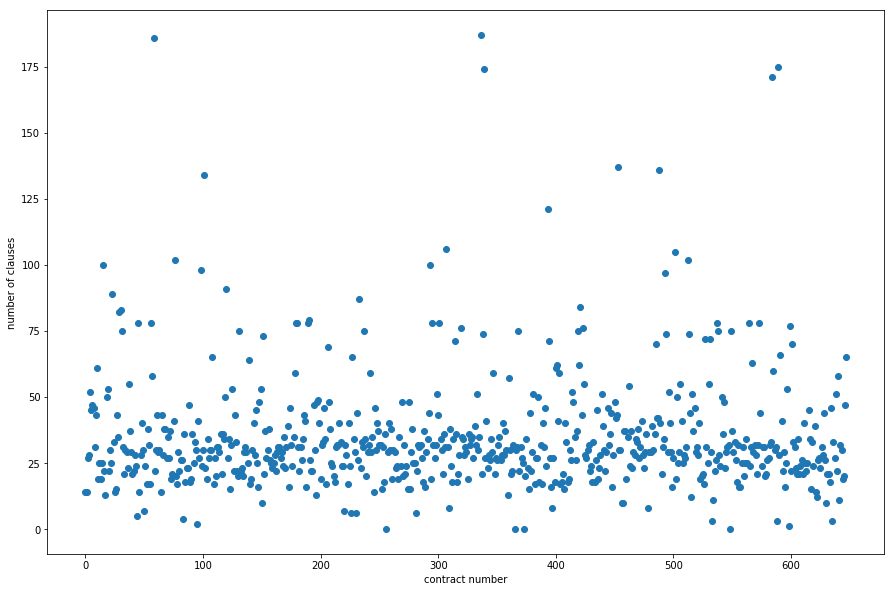

In [89]:
sizes = [len(contract) for contract in data]
plt.figure(figsize=(15,10))
plt.scatter([range(len(sizes))],sizes)
plt.xlabel('contract number')
plt.ylabel('number of clauses')

We can observe that we have some outliers in the corpus:
* contracts with "too many" clauses
* contracts with almost no clauses

In [102]:
contracts_df

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,ARTICLE 1 Forme La société est une entreprise ...,ARTICLE 2 Objet La société a pour objet en Fra...,ARTICLE 3 Dénomination La dénomination de la s...,ARTICLE 4 Siège social Le siège social est fix...,ARTICLE 5 Durée La durée de la société est fix...,ARTICLE 6 Exercice social L exercice social co...,"ARTICLE 7 Apports CLOVIS, SARL au capital de 5...",ARTICLE 9 Augmentation et réduction du capital...,ARTICLE 10 Représentation des parts sociales L...,ARTICLE 1 1 Cession et transmission des parts ...,...,None,None,None,None,None,None,None,None,None,None
1,ARTICLE 1 Forme La société est une entreprise ...,ARTICLE 2 Objet La société a pour objet en Fra...,ARTICLE 3 Dénomination La dénomination de la s...,ARTICLE 4 Siège social Le siège social est fix...,ARTICLE 5 Durée La durée de la société est fix...,ARTICLE 6 Exercice social L exercice social co...,"ARTICLE 7 Apports CLOVIS, SARL au capital de 5...",ARTICLE 9 Augmentation et réduction du capital...,ARTICLE 10 Représentation des parts sociales L...,ARTICLE 1 1 Cession et transmission des parts ...,...,None,None,None,None,None,None,None,None,None,None
2,ARTICLE ler FORME La société est une société à...,ARTICLE 2 DENOMINATION La société est dénommée...,ARTICLE 3 OBJET La société a pour objet : Le c...,ARTICLE 4 SIEGE Le siège de la société est fix...,ARTICLE 5 DUREE La durée de la société est de ...,ARTICLE 6 FORMATION DU CAPITAL Le soussigné ap...,ARTICLE 7 CAPITAL PARTS SOCIALES Le capital so...,ARTICLE 8 DROITS DES PARTS SOCIALES Chaque par...,ARTICLE 9 TRANSMISSION DE PARTS La cession des...,ARTICLE 10 LIQUIDATION JUDICIAIRE DE L ASSOCIE...,...,None,None,None,None,None,None,None,None,None,None
3,Article 2 DENOMINATION La dénomination sociale...,"Article 3 OBJET La Société a pour objet, en Fr...",Article 4 SIEGE SOCIAL Le siège de la Société ...,Article 5 DUREE La durée de la Société est de ...,Article 6 FORMATION DU CAPITAL APPORTS A la co...,Article 7 CAPITAL SOCIAL Le capital social est...,Article 8 AUGMENTATION DU CAPITAL SOCIAL Le ca...,Article 9 REDUCTION DU CAPITAL SOCIAL La réduc...,Article 10 FORME DES ACTIONS Les actions sont ...,Article 11 1. CESSION ET TRANSMISSION DES ACTI...,...,None,None,None,None,None,None,None,None,None,None
4,ARTICLE 1 FORME La société (la « Société ») es...,ARTICLE2 DENOMINATION SOCIALE La Société a pou...,ARTICLE 3 OBJET SOCIAL La Société a pour objet...,ARTICLE 4 SIÈGE SOCIAL Le siège social est éta...,ARTICLE5 DURÉE La durée de la Société est fixé...,ARTICLE 7 CAPITALSOCIAL Le capital social est ...,ARTICLE 8 MODIFICATION DUCAPITALSOCIAL Le capi...,ARTICLE 9 9.1 LIBERATIONDES ACTIONS Les action...,9.2 Les appels de fonds sont portés à la conna...,"ARTICLE 10 10.1 FORME, CESSION ET TRANSMISSION...",...,None,None,None,None,None,None,None,None,None,None
5,"ARTICLE 1 FORME La société, de forme société p...",ARTICLE 2 DENOMINATION La dénomination sociale...,ARTICLE 3 OBJET La Société a pour objet en Fra...,ARTICLE 4 SIÈGE SOCIAL Le siège social est fix...,ARTICLE 5 DUREE Saufprorogation ou dissolution...,ARTICLE 6 CAPITAL SOCIAL Le capital social est...,ARTICLE 7 MODIFICATIONS DU CAPITAL SOCIAL Le c...,ARTICLE 8 LIBERATION DES ACTIONS,8.1 Les actions souscrites en numéraire lors d...,8.2 Les appels de fonds sont portés à la conna...,...,None,None,None,None,None,None,None,None,None,None
6,"ARTICLE 1 FORME La société, de forme société p...",ARTICLE 2 DENOMINATION La dénomination sociale...,ARTICLE 3 OBJET La Société a pour objet en Fra...,ARTICLE 4 SIEGE SOCIAL Le siège social est fix...,ARTICLE 5 DUREE Sauf prorogation ou dissolutio...,ARTICLE 6 CAPITAL SOCIAL Le capital social est...,ARTICLE 7 MODIFICATIONS DU CAPITAL SOCIAL Le c...,ARTICLE 8 LIBERATION DES ACTIONS,8.1 Les actions souscrites en numéraire lors d...,8.2 Les appels de fonds sont portés à la conna...,...,None,None,None,None,None,None,None,None,None,None
7,"ARTICLE 1 FORME La société, de forme société p...",ARTICLE 2 D

In [98]:
ix = contracts_df[contracts_df[0].isna()].index
ix

Int64Index([256, 365, 373, 548], dtype='int64')

In [100]:
contracts_df.iloc[256,0]

In [101]:
json_files[256]

'dataset\\STATUTS 430-OCR_OCR-pdfa\\STATUTS 430-OCR_OCR-pdfa.json'

In [94]:
test = pd.DataFrame(contracts_df.values.flatten())


,0
count,22796
unique,18992
top,"ARTICLE 10 FORME, CESSION ET TRANSMISSION DES ..."
freq,31


In [23]:
clauses = [clause for contract in data for clause in contract ]
clauses_df = pd.DataFrame(clauses, columns=['text'])

In [24]:
clauses_df.describe()

,text
count,22782
unique,18992
top,"ARTICLE 10 FORME, CESSION ET TRANSMISSION DES ..."
freq,31


we can see that we have multiple duplicates. let's drop them to avoid adding a bias to the classifier

In [25]:
clauses_df.drop_duplicates(inplace=True)
clauses_df.describe()

,text
count,18992
unique,18992
top,ARTICLE 21. LIQUIDATION
freq,1


In [34]:
max_nb_clauses = max(contract for contract in data)
data.index(max_nb_clauses)
json_files[597]

'dataset\\Statuts signés 2-OCR_OCR\\Statuts signés 2-OCR_OCR.json'

## Pre-processing pipeline :

before editing the data, we can extract the "labels" of each clause (for evaluation purposes)
1. **Tokenization** (nltk word tokenizer should be good)  . check out spacy as well  
2. possible way to clean data :
    * delete all numerical and alphanumerical words
    * delete "ARTICLE x.x"
    * delete punctuation
3. **lower case**
4. explore the possibility of combining some "special words" into n-grams
5. **lemmatization**
6. **stop words**
7. **Save your work**

## Feature engineering

* **TF-IDF** or **TF** depending on the "clustering" model (NMF , LDA, Kmeans, LSI ...)
* if possible find some legal words embeddings for later semantic analysis

## Modeling
* LDA
* NMF
* Kmeans

## Evaluation and qualitative analysis
* look for possible measures and scores (coherence measure)

## Semantic analysis to extraction variation inside a cluster
* use Word embeddings

The problem here is how to measure similarity between documents (clause). one way to do this is to average the word embeddings forming the document into one single vector (**doc embedding**). 

the similarity measure would probably be the **cosine distance**